In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName'],axis=1,inplace = True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
df.CompanyName = df.CompanyName.str.lower()

# Replacing the wrong company names by correct company names
def replace_name(x,y):
    df.CompanyName.replace(x,y,inplace=True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

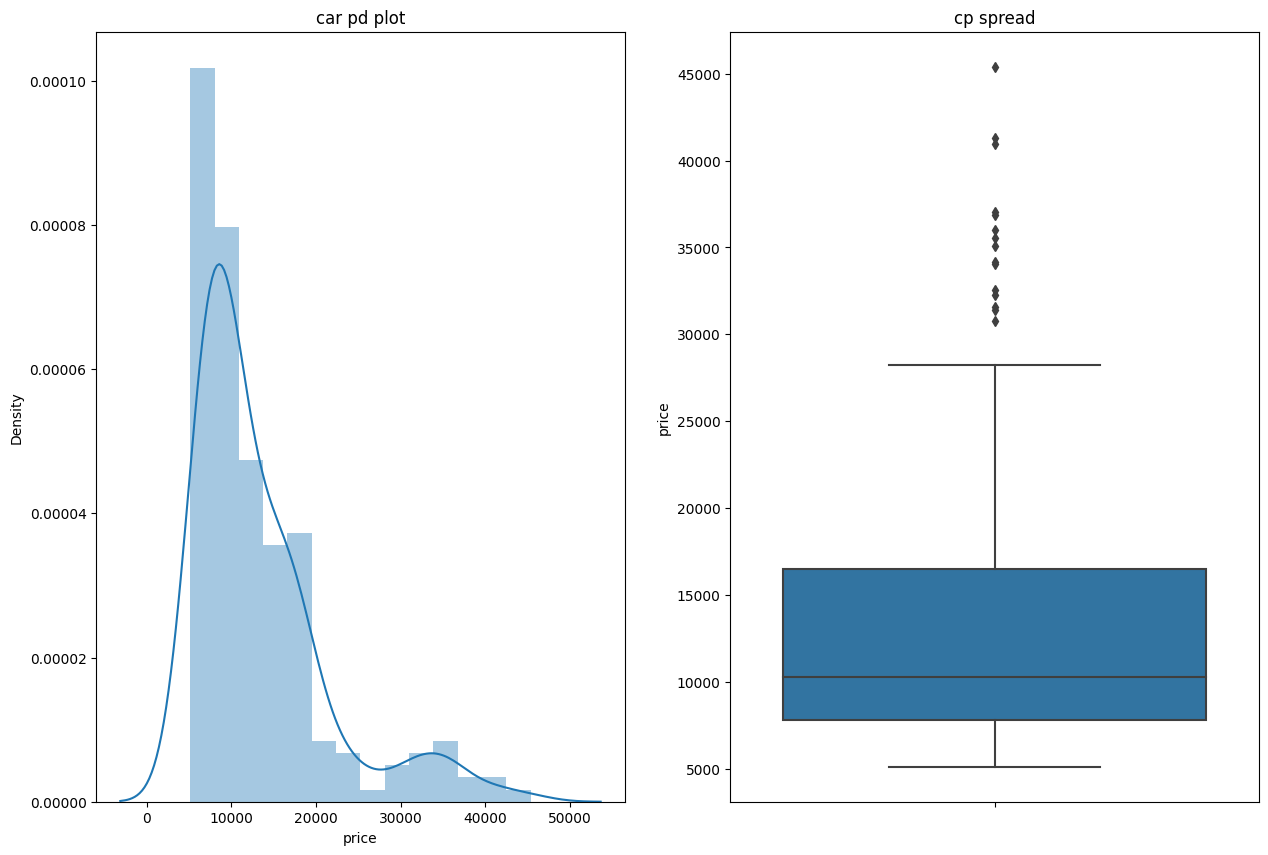

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('car pd plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('cp spread')
sns.boxplot(y=df.price)

plt.show()


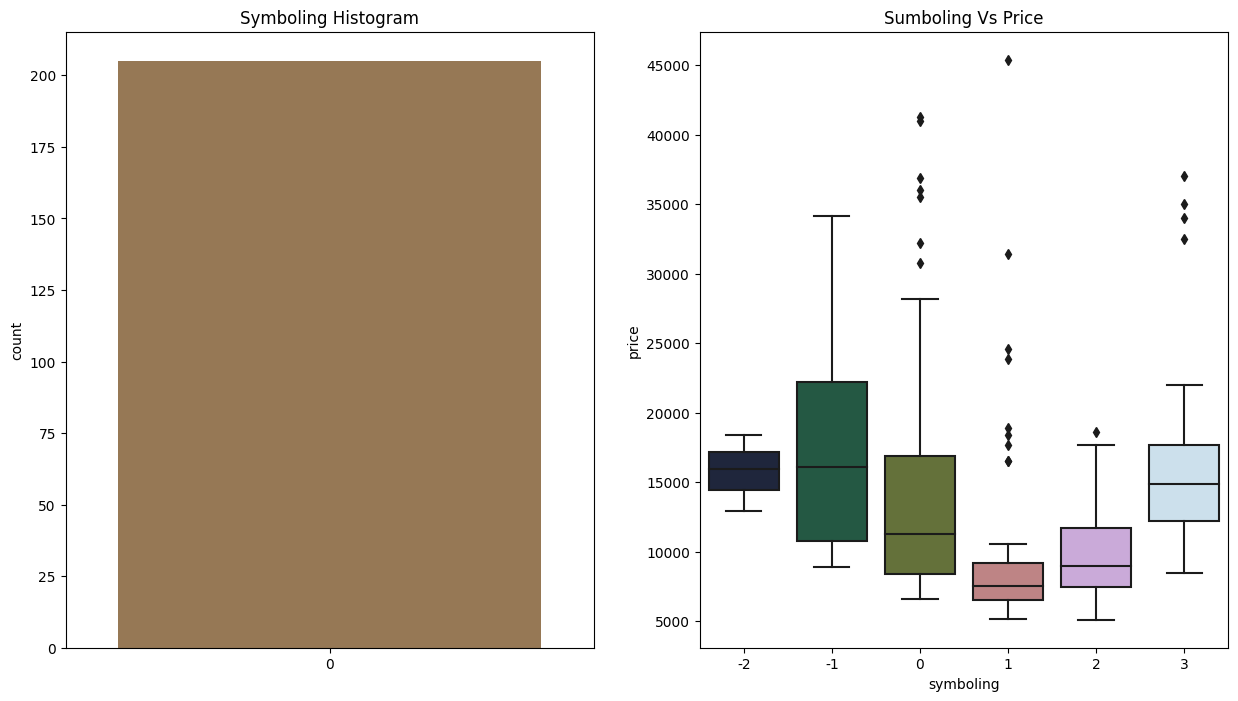

In [10]:
# Categorical Data

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=('cubehelix'))

plt.subplot(1,2,2)
plt.title('Sumboling Vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=('cubehelix'))

plt.show()

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

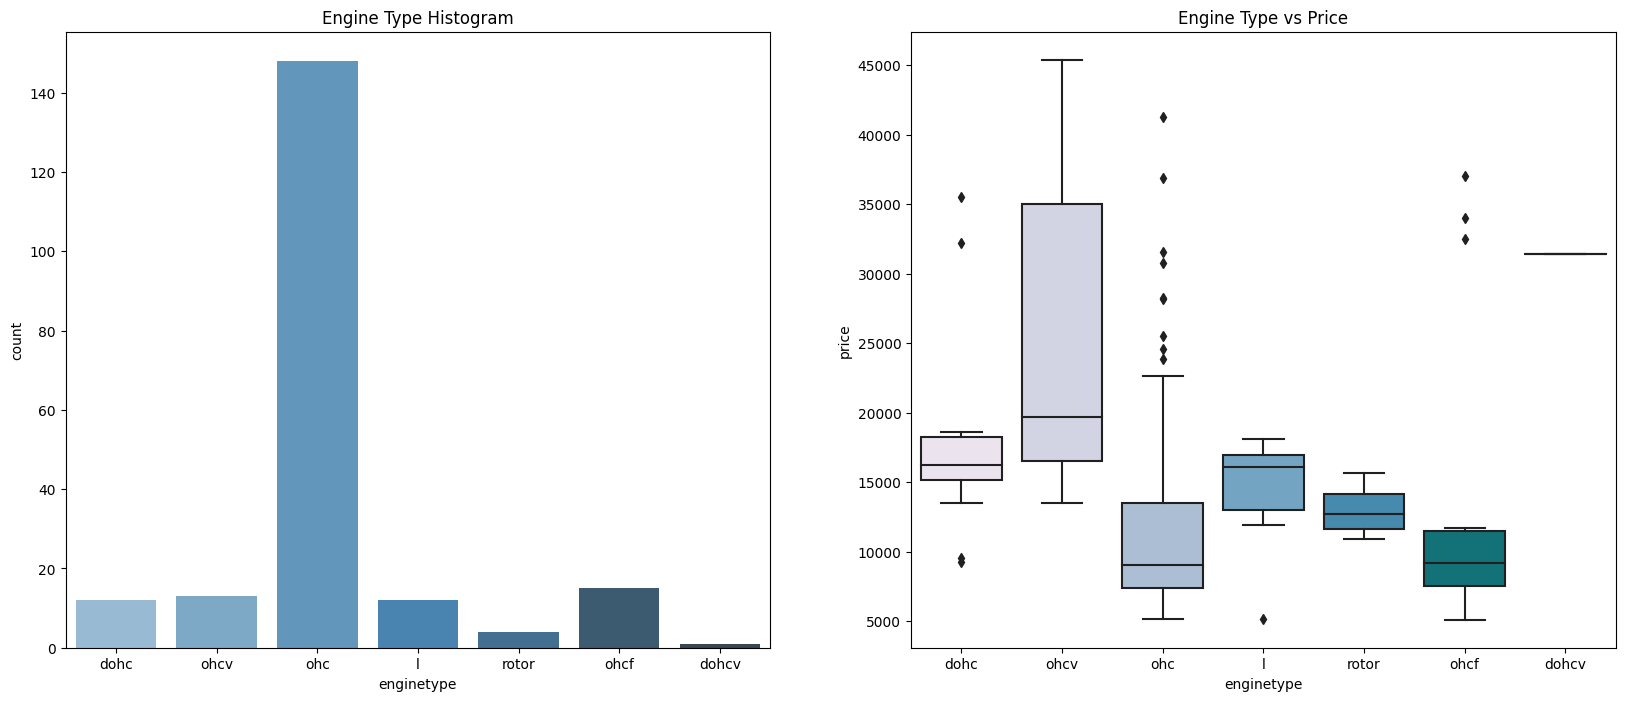

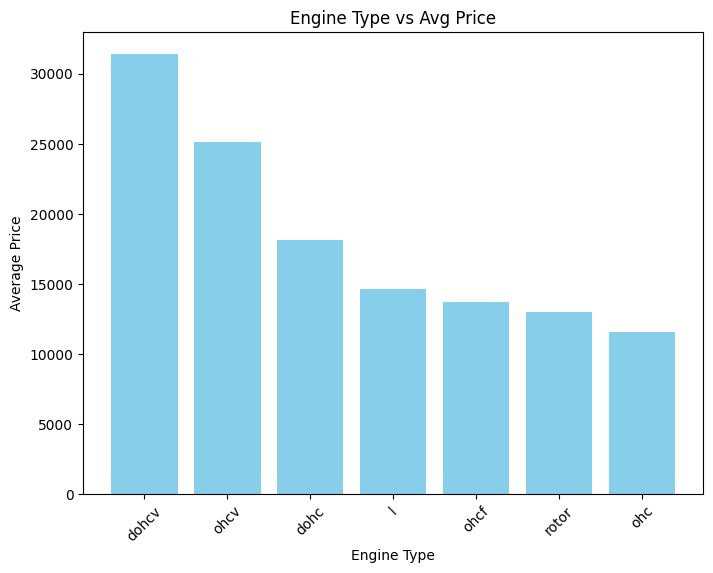

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(x='enginetype', data=df, palette="Blues_d")

plt.subplot(1, 2, 2)
plt.title('Engine Type vs Price')
sns.boxplot(x='enginetype', y='price', data=df, palette="PuBuGn")

plt.show()

# Calculate the mean price by engine type and create a bar plot
df_engine_type_mean = df.groupby(['enginetype'])['price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_engine_type_mean['enginetype'], df_engine_type_mean['price'], color="skyblue")
plt.title('Engine Type vs Avg Price')
plt.xlabel('Engine Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

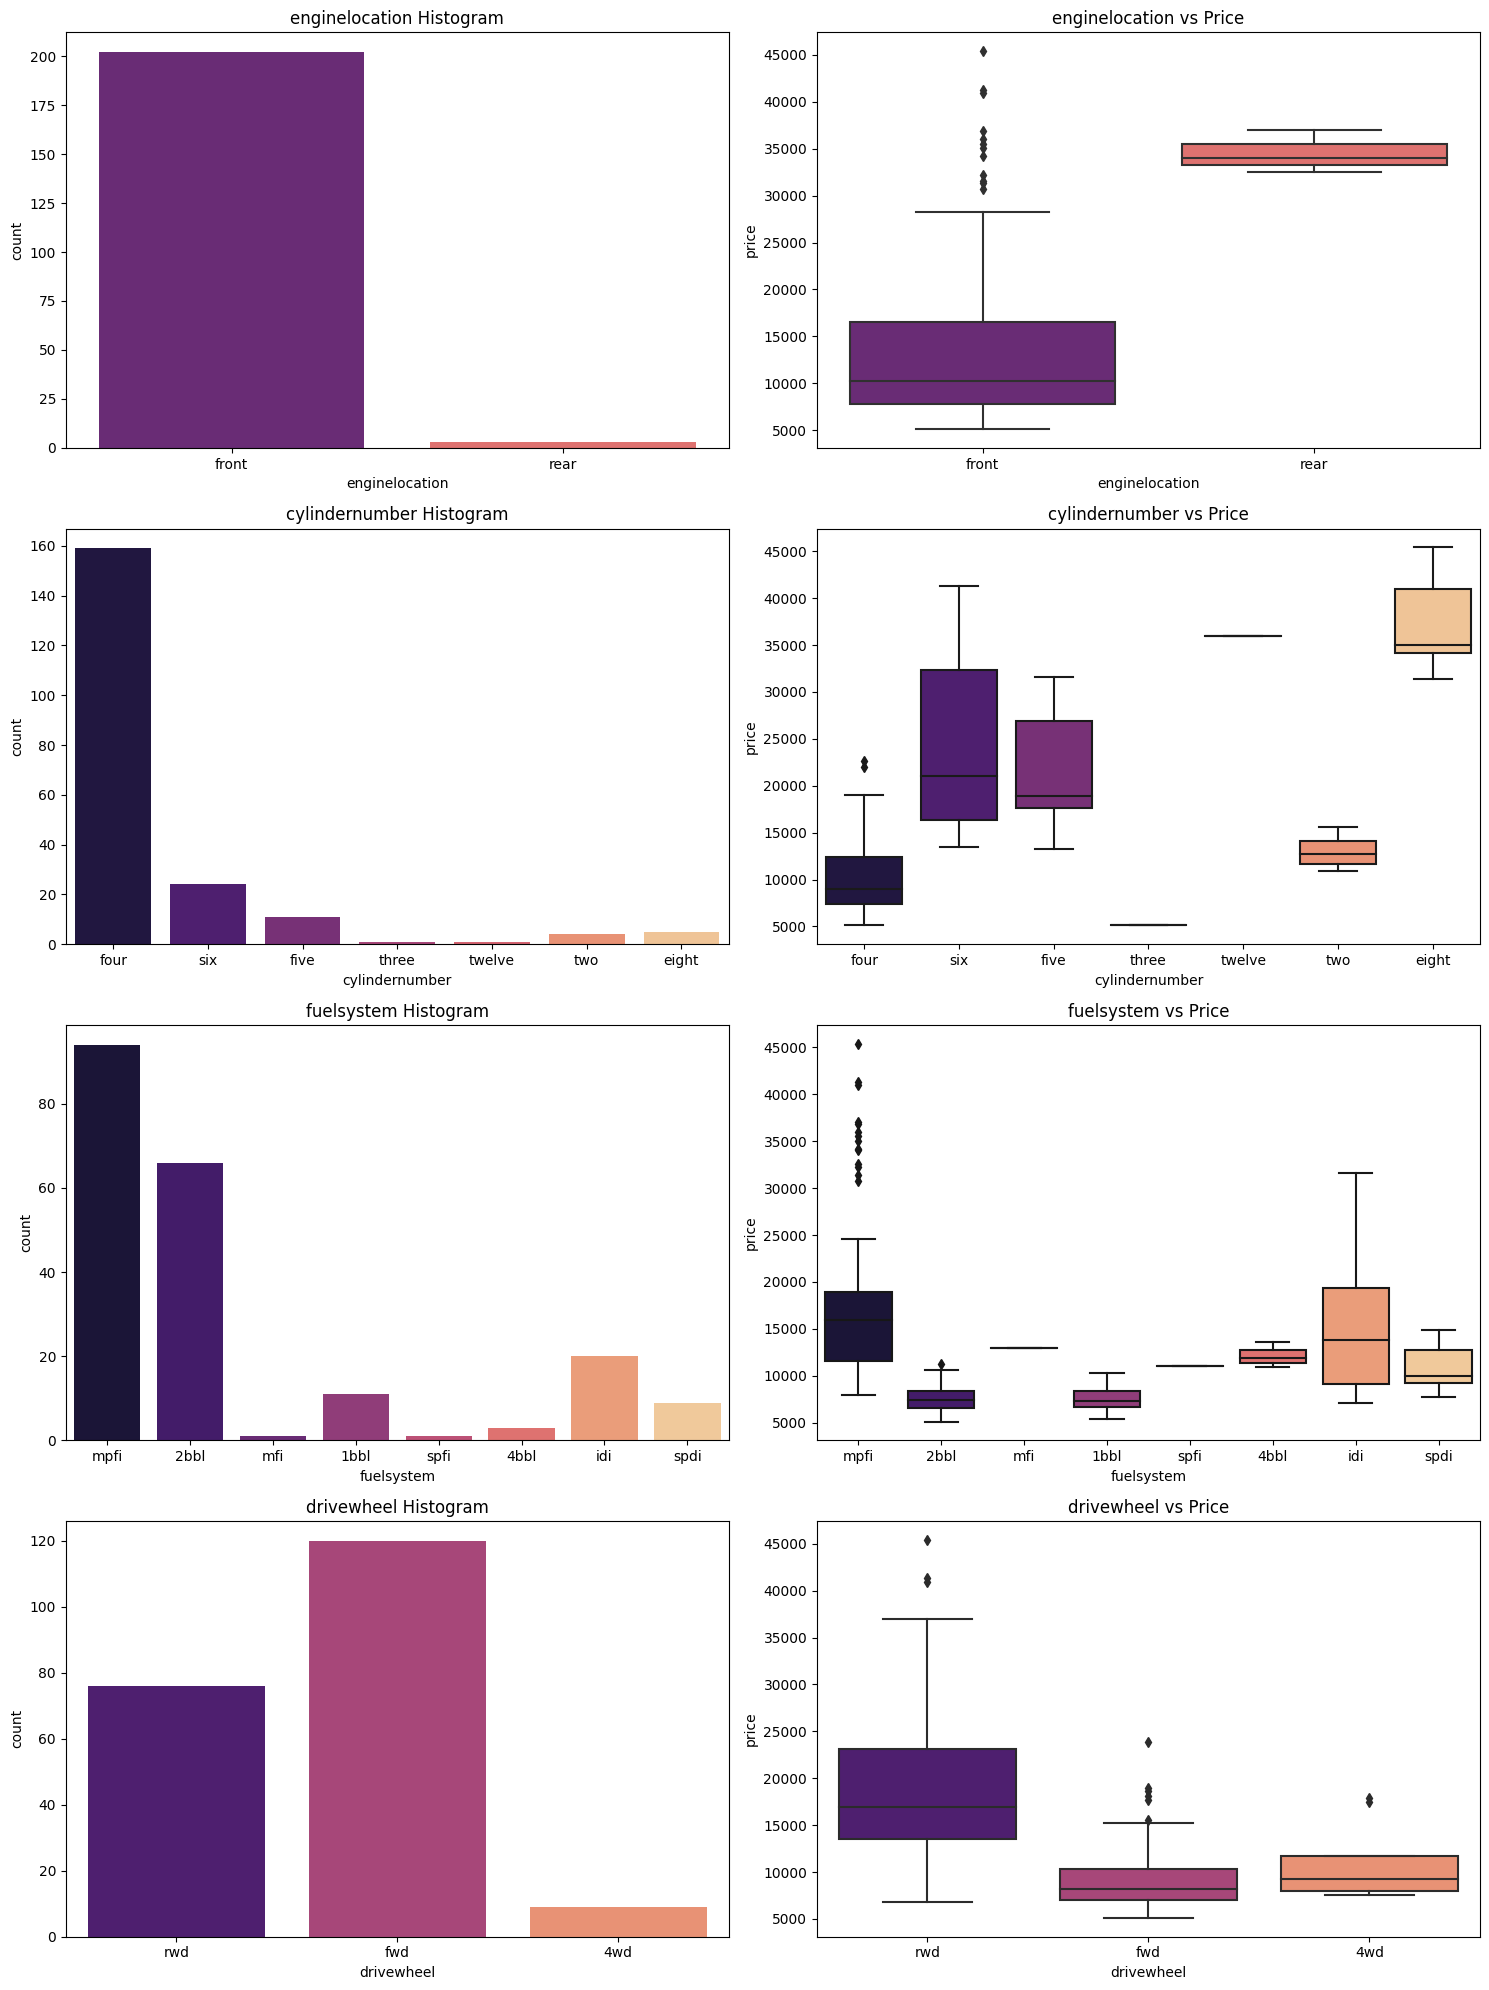

In [13]:
# create a set of countplots and boxplots for different categorical variables
def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' Histogram')
    sns.countplot(x=x, data=df, palette="magma")
    plt.subplot(4, 2, fig + 1)
    plt.title(x + ' vs Price')
    sns.boxplot(x=x, y='price', data=df, palette="magma")

plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()
plt.show()

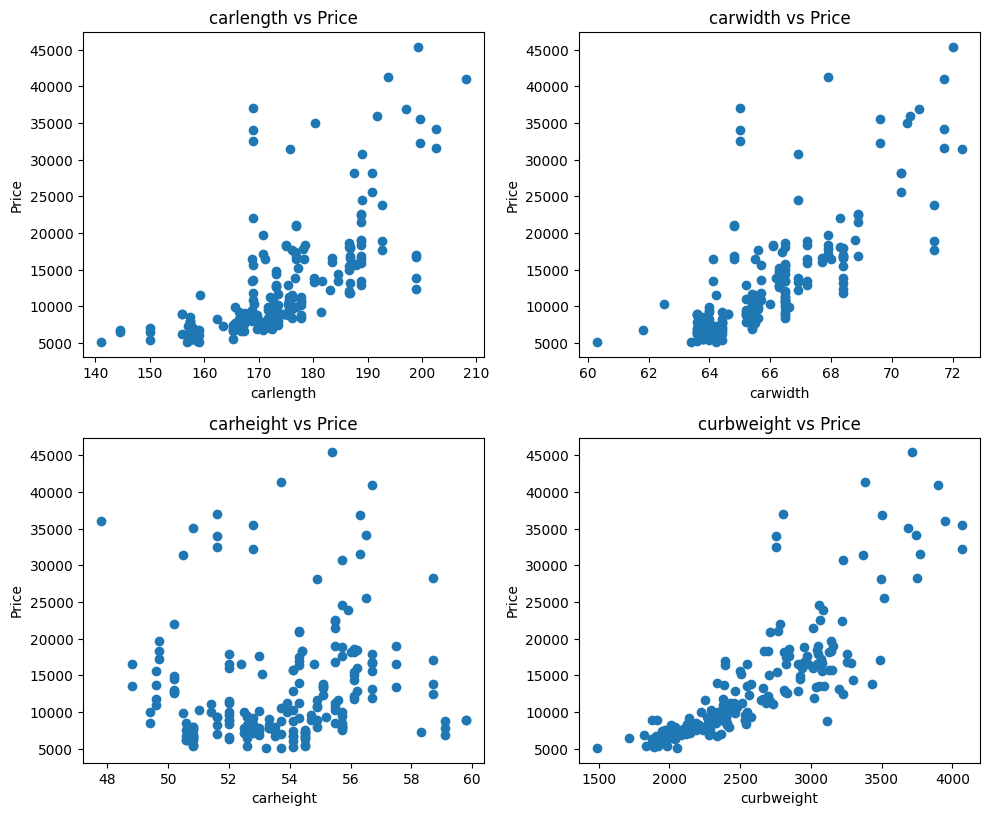

In [14]:
# create scatterplots for 'carlength', 'carwidth', 'carheight', and 'curbweight' against the 'price' variable
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(df[x], df['price'])
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()
plt.show()

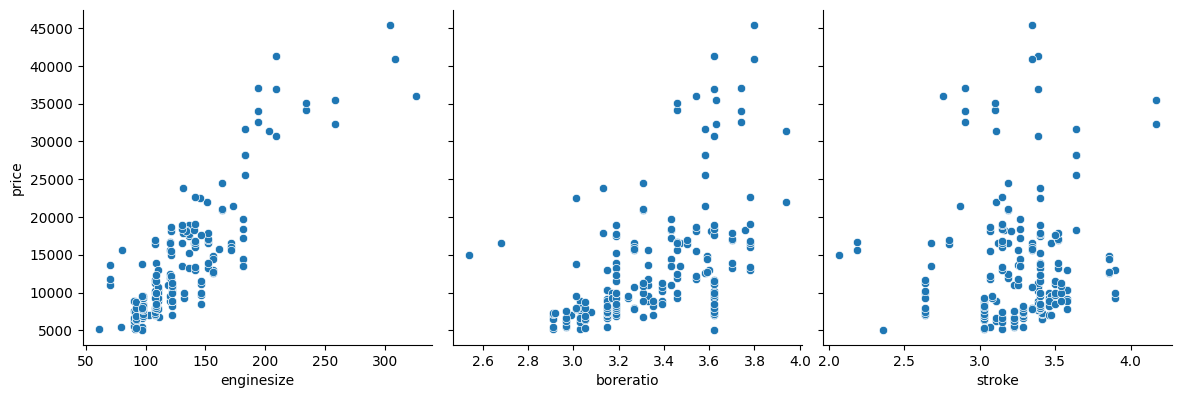

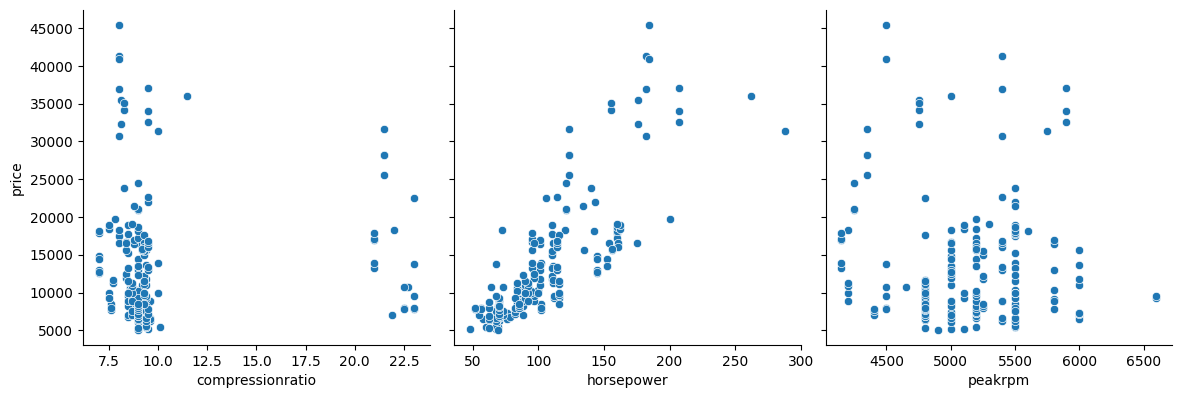

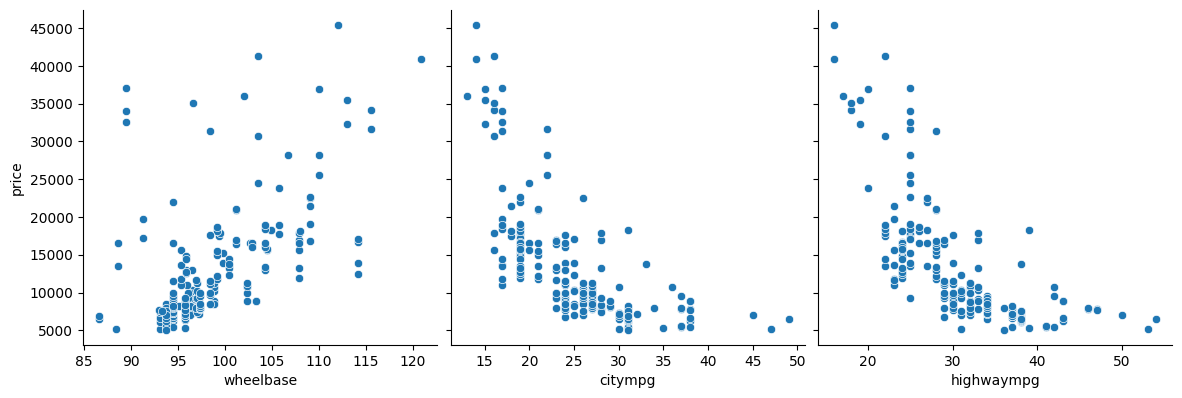

In [15]:
def pp(x, y, z):
    sns.pairplot(df, x_vars=[x, y, z], y_vars='price', height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [16]:
np.corrcoef(df['carlength'], df['carwidth'])[0, 1]

0.841118268481846

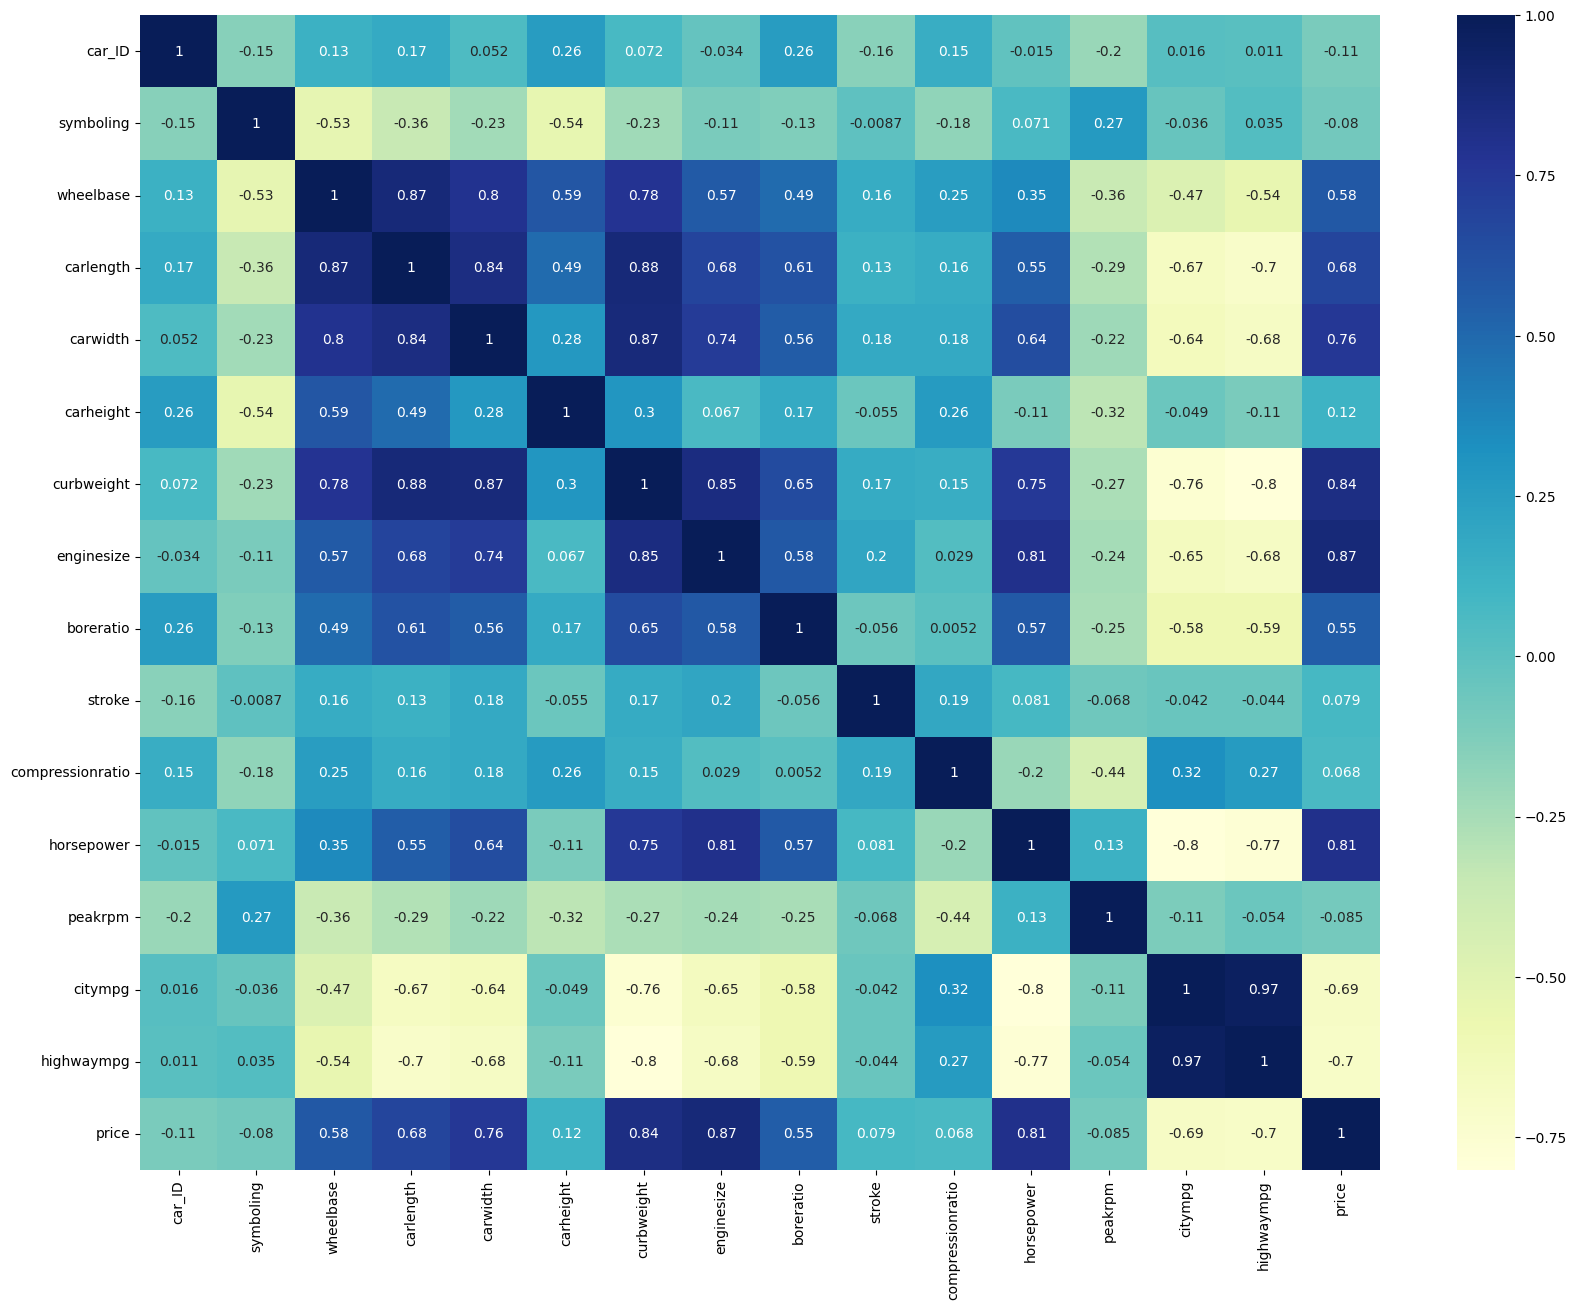

In [17]:
# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=['number'])

# Create a correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(numerical_cols.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [18]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
predict='price'
df=df[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]
x=np.array(df.drop(predict,axis=1))
y=np.array(df[predict])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

# Make predictions on the test data
predictions = model.predict(xtest)

# Evaluate the model using appropriate regression metrics
mae = mean_absolute_error(ytest, predictions)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1771.5690975609755
Mean Squared Error: 7346906.192777781
R-squared: 0.9069352420751736


#### The lower MAE and MSE suggest that, on average, the model's predictions are closer to the actual values, and the higher R-squared value (0.907) indicates that model explains a significant portion (approximately 90.7%) of the variance in the 'price' variable.